In [1]:
import pandas as pd
import torch
import os
import sys
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

sys.path.append('../audio_preprocessing')
sys.path.append('../src')
sys.path.append('../model_training_utils')

import preprocessing_func
from generator_to_dataset import NormalisedDataSet, NonNormalisedTestModelsDataSet
from gdsc_utils import PROJECT_DIR
import model_training

os.chdir(PROJECT_DIR)

In [2]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='equal', xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or 'Spectrogram (db)')
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    im = axs.imshow(spec, origin='lower', aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

In [3]:
def load_wav(path):
    wav, sr = librosa.load(path, sr=44100)
    return wav

In [4]:
df = pd.read_csv('data/metadata.csv')
df_train = df[df["subset"] == "train"]
df_val = df[df["subset"] == "validation"]
df_train.head()

,file_name,unique_file,path,species,label,subset,sample_rate,num_frames,length
0,Roeselianaroeselii_XC751814-dat028-019_edit1.wav,Roeselianaroeselii_XC751814-dat028-019,data/train/Roeselianaroeselii_XC751814-dat028-...,Roeselianaroeselii,56,train,44100,4586400,104.000000
1,Roeselianaroeselii_XC752367-dat006-010.wav,Roeselianaroeselii_XC752367-dat006-010,data/train/Roeselianaroeselii_XC752367-dat006-...,Roeselianaroeselii,56,train,44100,337571,7.654671
2,Yoyettacelis_GBIF2465208563_IN36000894_50988.wav,Yoyettacelis_GBIF2465208563_IN36000894_50988,data/train/Yoyettacelis_GBIF2465208563_IN36000...,Yoyettacelis,64,train,44100,220500,5.000000
3,Gomphocerippusrufus_XC752285-dat001-045.wav,Gomphocerippusrufus_XC752285-dat001-045,data/train/Gomphocerippusrufus_XC752285-dat001...,Gomphocerippusrufus,26,train,44100,693715,15.730499
5,Phaneropteranana_XC755717-221013-Phaneroptera-...,Phaneropteranana_XC755717-221013-Phaneroptera-...,data/train/Phaneropteranana_XC755717-221013-Ph...,Phaneropteranana,41,train,44100,88200,2.000000


In [75]:
path = "data/val/Leptophyespunctatissima_XC752570-dat141-007_edit2.wav"
print(path)

data/val/Leptophyespunctatissima_XC752570-dat141-007_edit2.wav


(66150,) 0.22927856 -0.11984253
[37531]


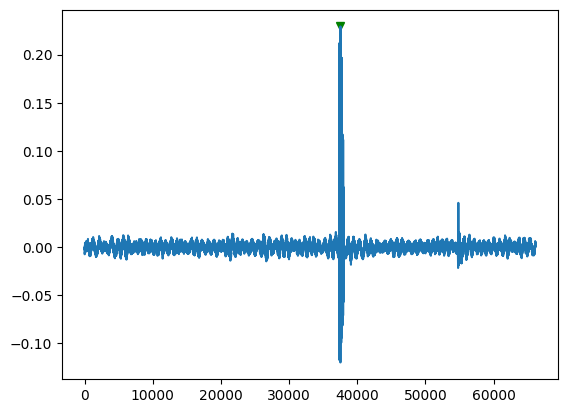

In [79]:
wav = load_wav(path)
print(wav.shape, wav.max(), wav.min())

height = wav.max()/4
peaks, _ = signal.find_peaks(wav[22050:166200], distance=66150, height=height)
print(peaks+22050)

plt.plot(peaks+22050, wav[:166200][peaks+22050], "vg")
plt.plot(wav[:166200])

In [77]:
def normalise_wav(wav, normalise_to:float=0.5):
    wav:float = wav - 0.5*(wav.max() + wav.min())
    max_value: float = max(abs(wav.max()), abs(wav.min()))
    return normalise_to*(wav/max_value)

[37531]


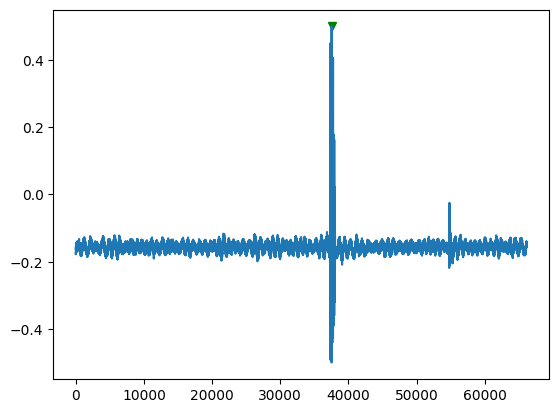

In [78]:
wav_normalised = normalise_wav(wav)

height = wav_normalised.max()/4
peaks, _ = signal.find_peaks(wav_normalised[22050:166200], distance=66150, height=height)
print(peaks+22050)

plt.plot(peaks+22050, wav_normalised[:166200][peaks+22050], "vg")
plt.plot(wav_normalised[:166200])

In [70]:
wav_normalised[39702-33750:39702+33750].shape

(67500,)

In [ ]:
path1 = "data/train/Chorthippusmollis_XC752480-dat062-010_edit2.wav"
path2 = "data/train/Chorthippusmollis_XC751760-dat005-064.wav"

wav_quite = load_wav(path1)
wav_loud = load_wav(path2)

In [ ]:
wav_quite = wav_quite[wav_quite.argmax() - 66150: wav_quite.argmax() + 66150]
wav_loud = wav_loud[wav_loud.argmax() - 66150: wav_loud.argmax() + 66150]

In [ ]:
wav_quite.shape, wav_loud.shape

In [ ]:
# wav_quite = 0.5 * (wav_quite / wav_quite.max())
# wav_loud = 0.5 * (wav_loud / wav_loud.max())

In [ ]:
wav_loud.max()

In [ ]:
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [ ]:
quite_spec, loud_spec = calculate_melsp(wav_quite), calculate_melsp(wav_loud)

In [ ]:
quite_spec.max(), loud_spec.max()

In [ ]:
plot_spectrogram(quite_spec)

In [ ]:
plot_spectrogram(loud_spec)

In [ ]:
things to do:
    nomralise waveform so they have same max
    splite the waveforms using peaks